Importando bibliotecas 

In [2]:
import geopandas as gpd
import pandas as pd
import folium
import numpy as np
import matplotlib.pyplot as plt

Criando variáveis e convertendo tipos de dados

In [35]:
pe = gpd.read_file('populacao_pernambuco_2010_2022.shp')
pe = pe[pe['NM_MUN'] != 'Fernando de Noronha' ]
pe['dif_pop'] = pe['POP_2022'] - pe['POP_2010'] 
pe.head()

,NM_MUN,POP_2010,POP_2022,CD_MUN,SIGLA_UF,AREA_KM2,geometry,dif_pop
0,Abreu e Lima,94.429,99.331,2600054,PE,126.384,"POLYGON ((-34.9148 -7.9276, -34.91576 -7.92712...",4.902
1,Afogados da Ingazeira,35.088,40.120,2600104,PE,377.696,"POLYGON ((-37.6649 -7.83209, -37.66622 -7.8303...",5.032
2,Afrânio,17.586,16.486,2600203,PE,1490.594,"POLYGON ((-41.03831 -8.78485, -41.03979 -8.784...",-1.100
3,Agrestina,22.679,23.739,2600302,PE,200.369,"POLYGON ((-35.94151 -8.53737, -35.94532 -8.536...",1.060
4,Água Preta,33.095,26.473,2600401,PE,531.935,"POLYGON ((-35.38049 -8.71793, -35.3699 -8.7198...",-6.622


In [34]:
pe.dtypes

NM_MUN        object
POP_2010     float64
POP_2022     float64
CD_MUN        object
SIGLA_UF      object
AREA_KM2     float64
geometry    geometry
dif_pop      float64
dtype: object

Verificando o sistema de referência geográfica

In [10]:
pe.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Estatísticas descritivas

In [13]:
pe.describe().round(3)

,POP_2010,POP_2022,AREA_KM2,dif_pop
count,184.000,184.000,184.000,184.000
mean,8396.522,8163.802,532.876,-232.720
std,113358.140,110179.323,684.994,3178.837
min,4.369,4.394,25.704,-43118.000
25%,13.596,13.459,147.945,-1.109
50%,21.912,21.268,265.876,0.006
75%,36.825,37.034,537.641,1.639
max,1537704.000,1494586.000,4561.870,94.183


Mapas

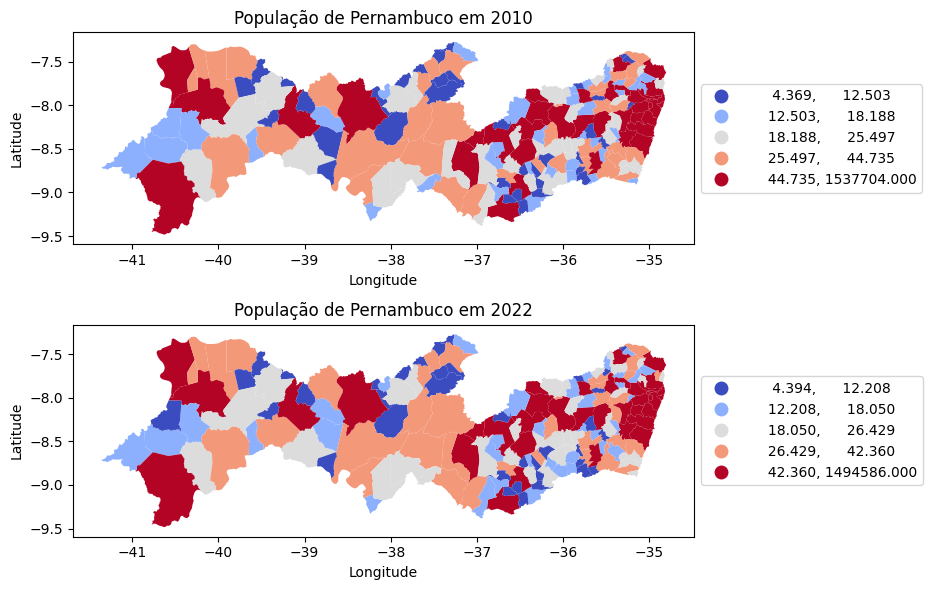

In [44]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6))


pe.plot(column='POP_2010', scheme='Quantiles', cmap='coolwarm', legend=True, 
          legend_kwds={'fmt': "{:.3f}", 'loc': 'center left', 'bbox_to_anchor': (1, 0.5)}, ax=ax1)

ax1.set_title("População de Pernambuco em 2010")
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')


pe.plot(column='POP_2022', scheme='Quantiles', cmap='coolwarm', legend=True, 
          legend_kwds={'fmt': "{:.3f}", 'loc': 'center left', 'bbox_to_anchor': (1, 0.5)}, ax=ax2)

ax2.set_title("População de Pernambuco em 2022")
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')

plt.tight_layout()
plt.show()

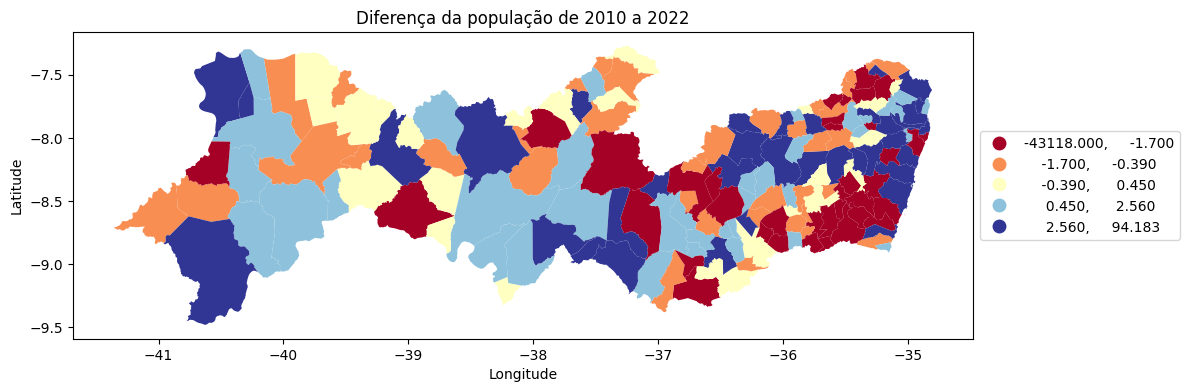

In [8]:
fig, ax = plt.subplots(figsize=(12, 6))


pe.plot(column='dif_pop', scheme='Quantiles', cmap='RdYlBu', legend=True, 
          legend_kwds={'fmt': "{:.3f}", 'loc': 'center left', 'bbox_to_anchor': (1, 0.5)}, ax=ax)

ax.set_title("Diferença da população de 2010 a 2022")
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.tight_layout()
plt.show()

A capital pernambucana (Recife) foi o município com a maior perda populacional de 43 mil pessoas. Essa diminuição pode ser explicada pela desmetropolização. A desmetropolização é um fenômeno social onde as pessoas mudam da capital para outros municípios da região metropolitana ou para o interior por causa de problemas de qualidade de vida, inchaço urbano, violência urbana e altos preços dos alugueis.

A partir dessa explicação, a cidade de Petrolina, localizada no sertão pernambucano, cresceu seu indice populacional em 31% em relação a 2010.